In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data= pd.read_csv('/Users/mohit/Downloads/data.csv')

In [4]:
data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

Missing values 

In [5]:
data.isnull().any().sum()

0

No missing values were found

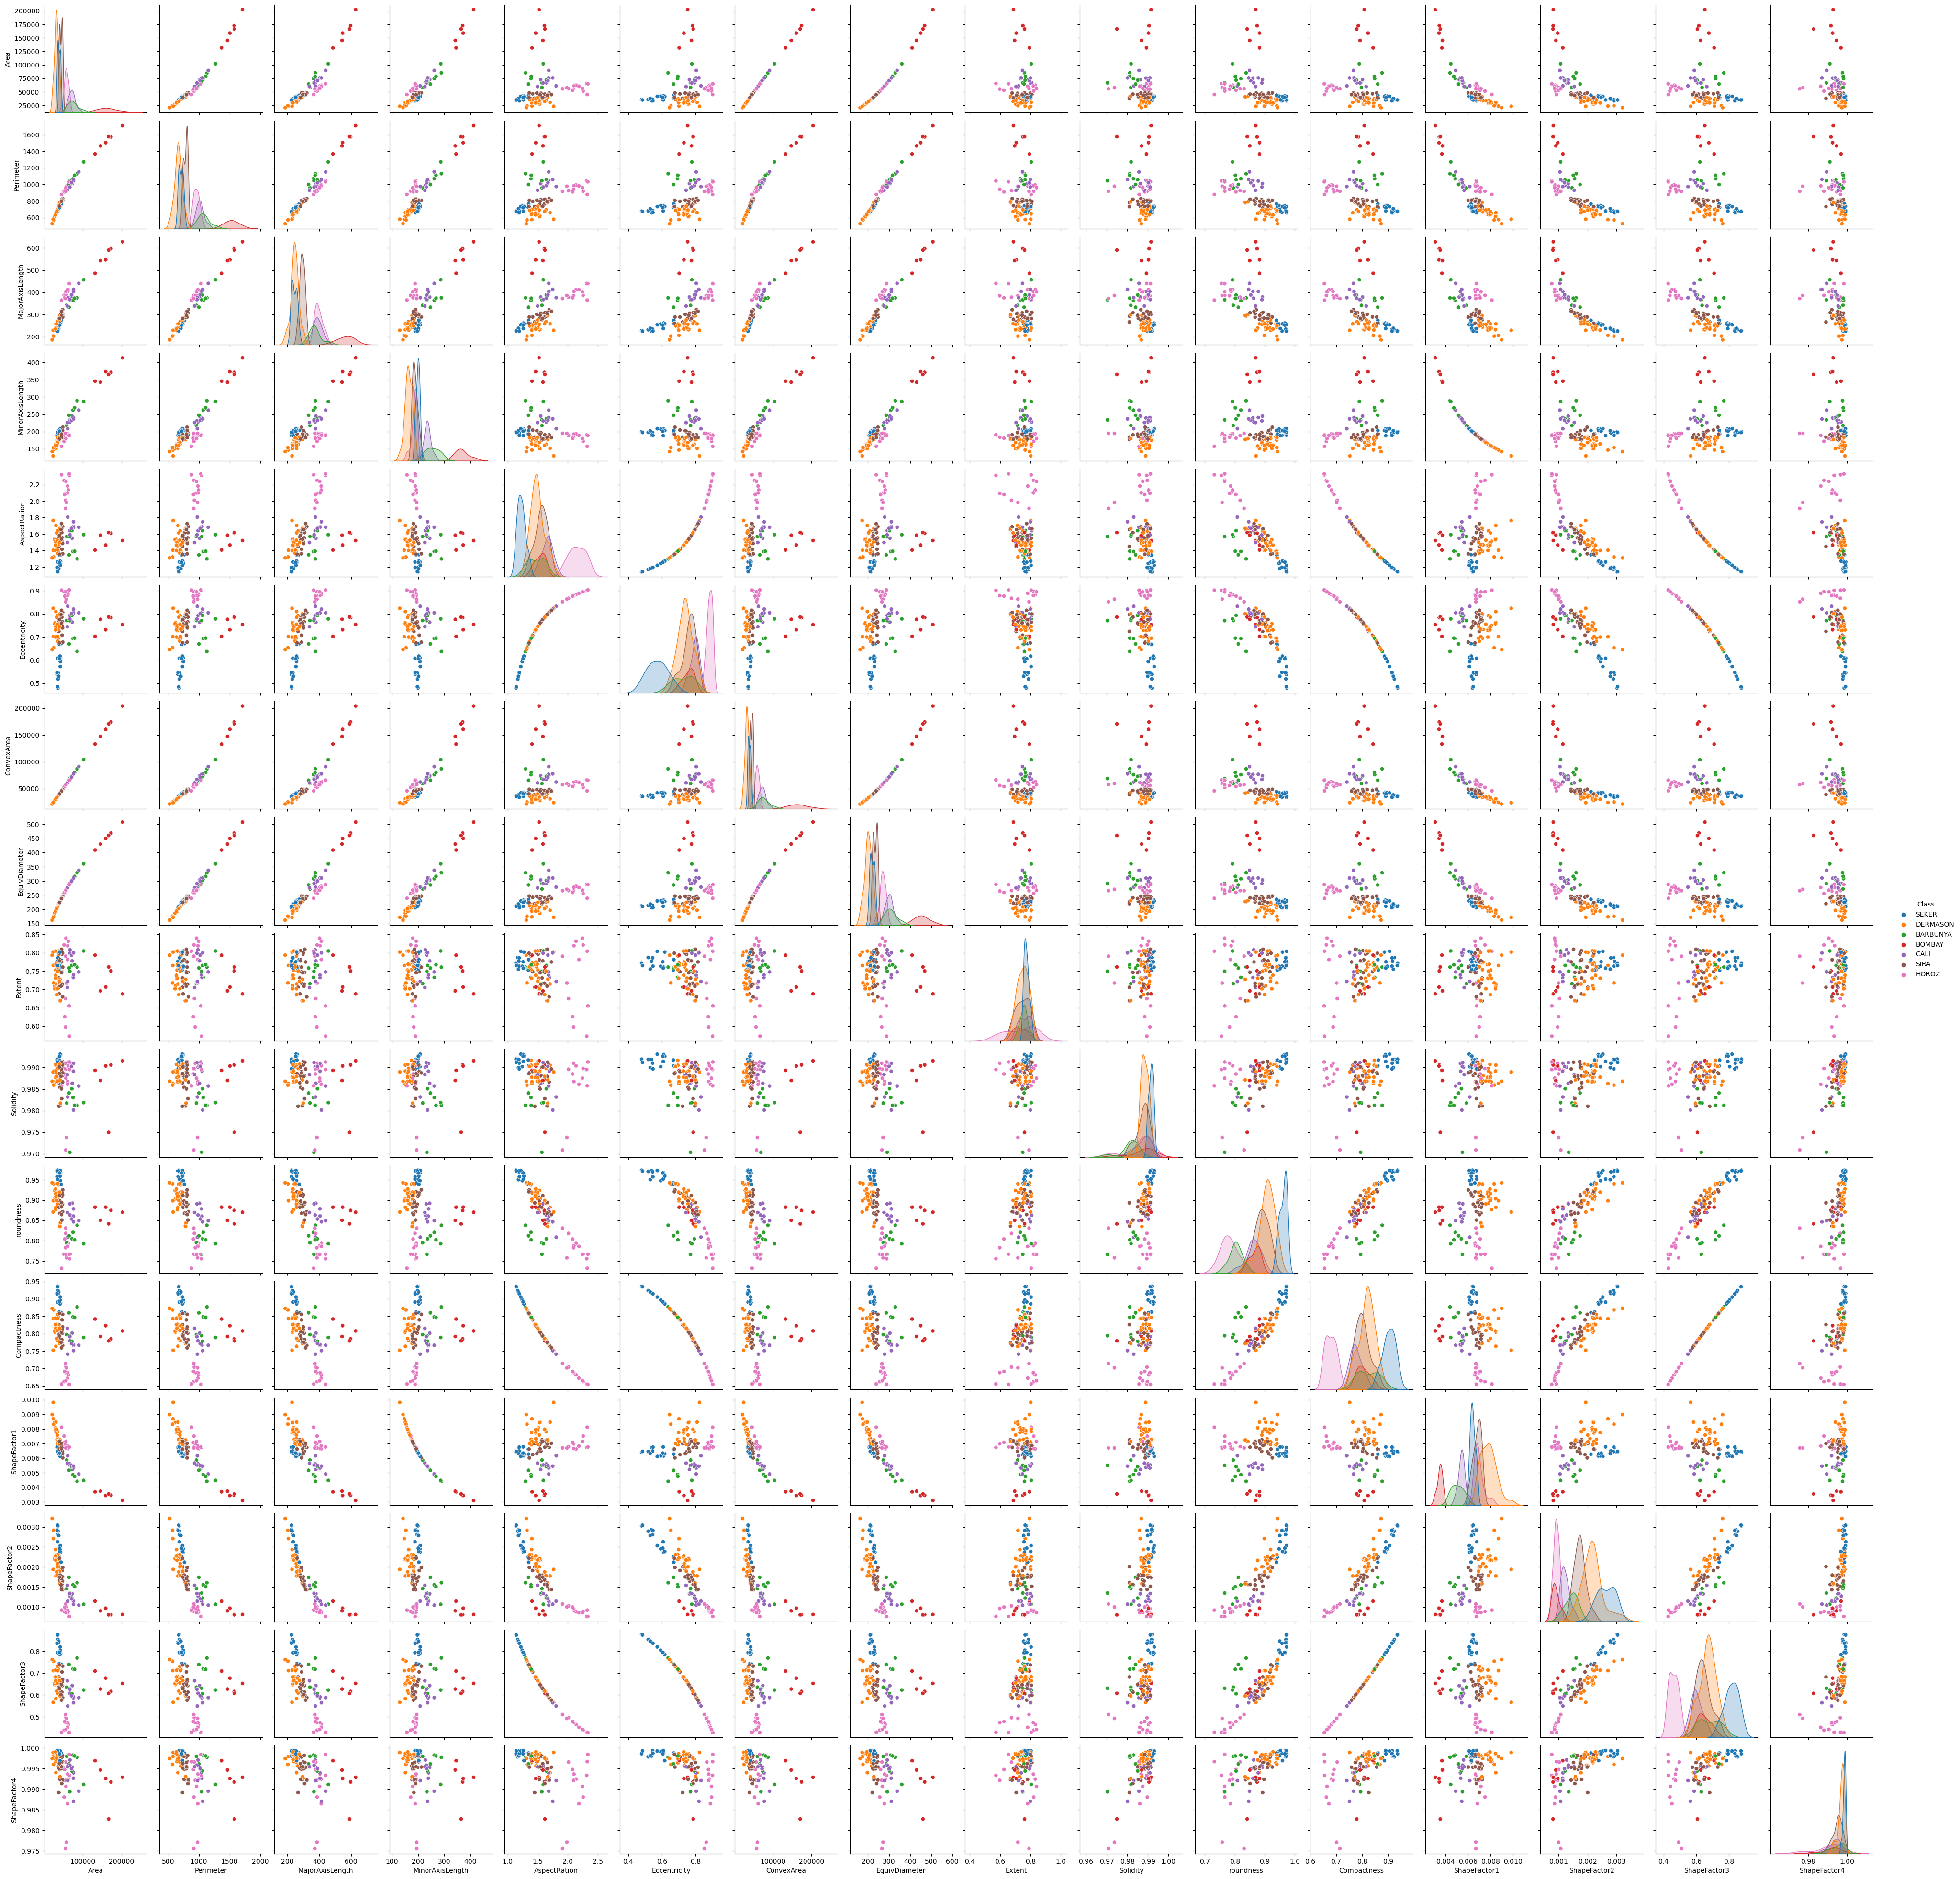

In [7]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data.sample(100), hue='Class')

## outliers Detection

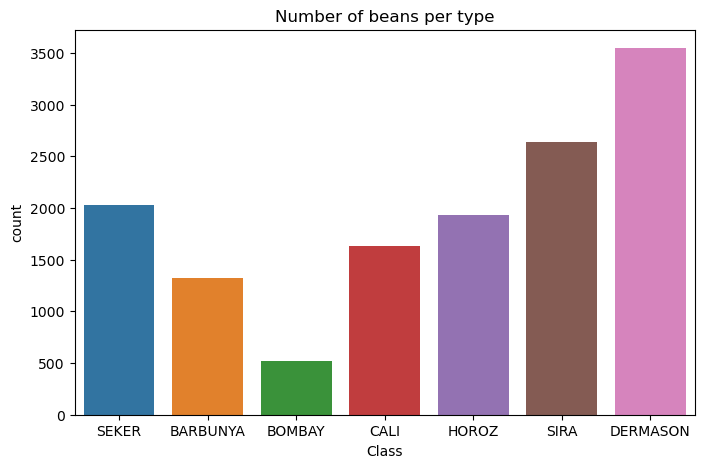

In [9]:
plt.figure(figsize = (8, 5))

sns.countplot(x = data["Class"])
plt.title("Number of beans per type")
plt.show()

<Axes: ylabel='Class'>

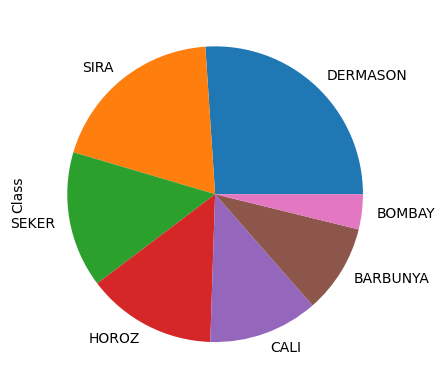

In [10]:
data.Class.value_counts().plot(kind='pie')

# Feature Engineering

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Class'])
data['Class'] = le.transform(data['Class'])

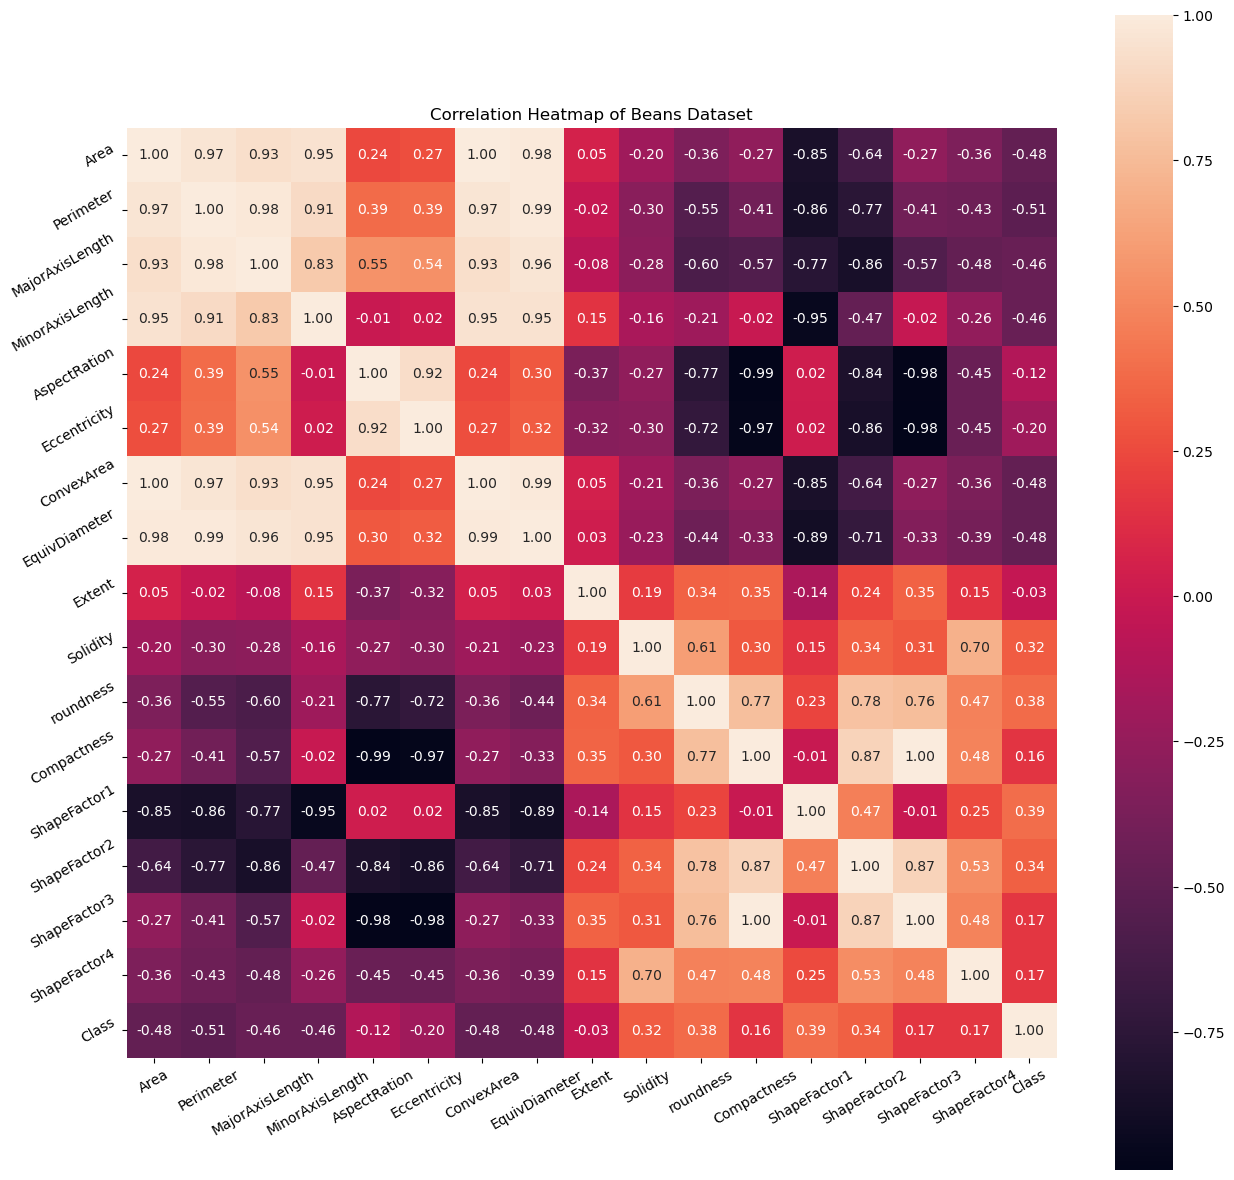

In [12]:
corr_matrix = data.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [17]:
data_0 = data.drop(['ShapeFactor3', 'Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1'], axis = 1)

In [18]:
data_0

Perimeter  Eccentricity    Extent  Solidity  roundness  ShapeFactor2  \
0        610.291      0.549812  0.763923  0.988856   0.958027      0.003147   
1        638.018      0.411785  0.783968  0.984986   0.887034      0.003564   
2        624.110      0.562727  0.778113  0.989559   0.947849      0.003048   
3        645.884      0.498616  0.782681  0.976696   0.903936      0.003215   
4        620.134      0.333680  0.773098  0.990893   0.984877      0.003665   
...          ...           ...       ...       ...        ...           ...   
13606    759.696      0.765002  0.714574  0.990331   0.916603      0.001749   
13607    757.499      0.735702  0.799943  0.990752   0.922015      0.001886   
13608    759.321      0.734065  0.729932  0.989899   0.918424      0.001888   
13609    763.779      0.741055  0.705389  0.987813   0.907906      0.001852   
13610    772.237      0.786693  0.788962  0.989648   0.888380      0.001640   

       ShapeFactor4  Class  
0          0.998724      5  
1          0.998430      5  
2          0.999066      5  
3          0.994199      5  
4          0.999166      5  
...             ...    ...  
13606      0.998385      3  
13607      0.998219      3  
13608      0.996767      3  
13609      0.995222      3  
13610      0.998180      3  

[13611 rows x 8 columns]

The function below is used to retrieve the inputs and outputs from the dataset provided:

In [19]:
def get_X_y(dataset, scaler=None):
    X = dataset.drop('Class', axis=1)
    y = dataset['Class']
    
    if scaler != None:
        scaler = scaler.fit(X)
        X = scaler.transform(X)

    return X, y
        
X, y = get_X_y(data)

X.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.994199  
4     0.970516      0.006697      0.003665      0.941900      0.999166

# Cross validation and parameter tuning
## Auxiliary function to perform parameter tuning with cross validation

For parameter selection we use GridSearchCV and for oversampling we use imblearn's SMOTE.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def tune_model(dataset, model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None, oversample=False): 
    X, y = get_X_y(dataset, scaler)
    
    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)


    grid_search = GridSearchCV(
        model_instance,
        param_grid=parameter_grid,
        cv=cross_validation,
        scoring="f1_weighted"
    )

    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_
    return grid_search

# Time measuring


In [21]:
from sklearn.model_selection import train_test_split
import time

def measure_time(dataset, model_instance, params, scaler=None, oversample=False):
    X, y = (dataset, scaler)

    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)
    model_instance.set_params(**params)

    (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=1)
    
    start = time.time()
    model_instance.fit(X_train, y_train)
    end = time.time()
    return end - start

# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 7),
    'max_features': range(1, 7)
}

# No oversampling / No feature selection

data_1 = tune_model(data, DecisionTreeClassifier(), parameter_grid)

Best score: 0.7928066605378492
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'splitter': 'random'}


# SVM

The SVM algorithm expects the data to be standardized, so we use the *Sklearn StandardScaler* to standardize our data. If this is not performed prior to training the model, the efficiency will be all over the place.

In [26]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import numpy as np

Text(0.5, 1.0, 'Average score: 0.5766130328718734')

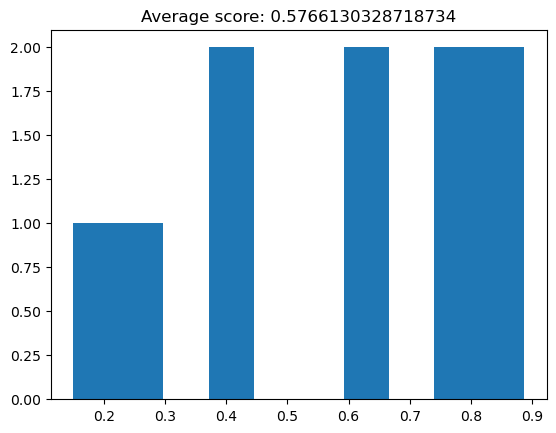

In [27]:
X, y = get_X_y(data)

# Without standardizing the data:
svc = SVC()
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.8967921142892902')

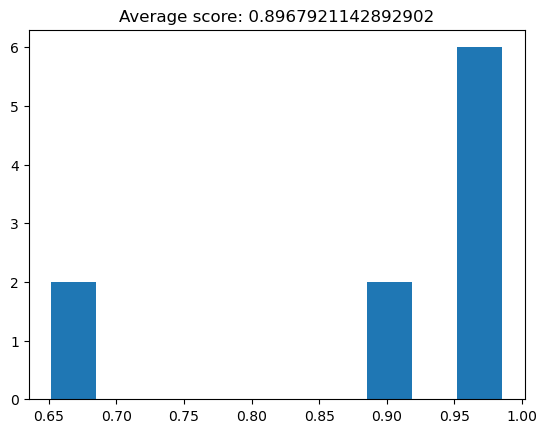

In [28]:
# Standardizing the data:
standardized_X, y = get_X_y(data, scaler = StandardScaler())

svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

# K-nearest neighbours (KNN)
Just like the SVM model, the KNN model also requires the data to be standardised.

Text(0.5, 1.0, 'Average score: 0.5688218907018572')

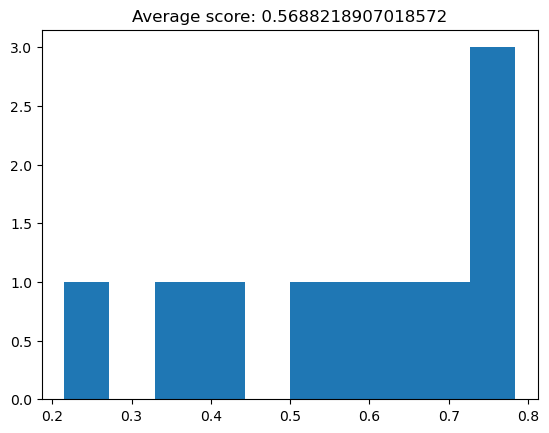

In [32]:
# Without standardizing the data
from sklearn import neighbors

X, y = get_X_y(bean_data)

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Without standardizing the data the results are not good

Text(0.5, 1.0, 'Average score: 0.8851072082482323')

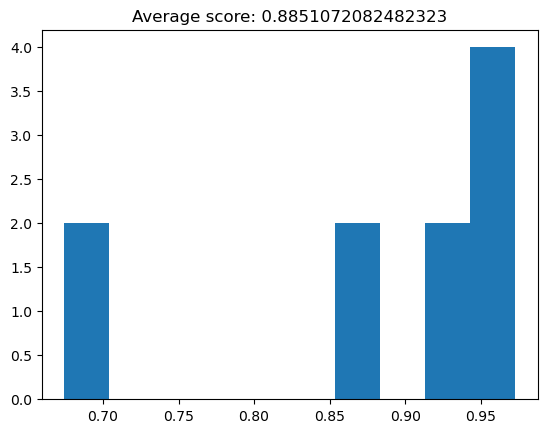

In [34]:
# Standardizing the data
standardized_X, y = get_X_y(data, scaler=StandardScaler())

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [36]:
knn = neighbors.KNeighborsClassifier()
knn = tune_model(bean_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.8919230426452321
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 15}


# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

parameter_grid = {}
nb_original = tune_model(data_0, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8639351891496304
Best parameters: {}


In [38]:
nb = tune_model(data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8627683051948699
Best parameters: {}


In [39]:
parameter_grid = {}
nb_os_fs = tune_model(bean_data, GaussianNB(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8606474689361556
Best parameters: {}


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1], 
    'max_features': ['sqrt'],
    'criterion': ['gini', 'entropy']
}
rfc_original = tune_model(data_0, RandomForestClassifier(), parameter_grid)
max_features='sqrt'

Best score: 0.8463085773422353
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'n_jobs': -1}


In [45]:
rfc = tune_model(bean_data, RandomForestClassifier(), parameter_grid)

Best score: 0.8476588730888561
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}


From above observation Random forest classifier and Naive bayes classifier with the score 84.76% & 86.06% accuracy respectively. 
these Machine learning models are best suited for the classification.